# **IEOR 4404  Simulation (Fall 2019)**

**Homework 1 [Total points: 60]**

** Due: 11:59 PM, September 24**

This first homework consists of Python programming practices and the applications to statistics. You will only need to knowledge up to lecture 4 to answer these questions.

The steps to finish in the homework:

*   Step 1: Make a copy of the file to your LionDrive.
*   Step 2: Work with the copy (an ipynb file).
*    <font color='red'>**Step 3: Rename the copy to your_uni_hw1.ipynb (For example: yd4501_hw1.ipynb).**</font>  
*   Step 4: Submit the copy on CourseWorks.

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)


**All the questions in this homework requires coding**

In [1]:
#This imports all the packages you need for the homework

#Please run this first
#we will need this for array operation
import numpy as np

#We will need this for factorial computation
import scipy.special as spsp

#We will need this for visualization
import matplotlib.pyplot as plt

#We can use this for math functions
import math

#We can use this for stats functions
import scipy.stats as stats

# Exercise 1 [Total: 20 Points]

In this exercise, we will work on some problems that will help you practice your programming kills. 

You might find some of the following functions useful. 

`np.array()`, `np.arange()`, `np.sum()`, `np.min()`, `np.max()`, `np.abs()`, `np.mean()`

These functions are either covered in the lectures or should be self explanatory. 

If you are not sure about how to use a specific function, Google the function name. 

## Q1 [7 points]
Without using a loop, perform the following task:

(1) Define an array as follows 
     [1,2,3,4,5,5,3,4,2,1,1,3,2,4,5]

(2) For this array, return the value furthest away from the mean.

(2) If multiple values are tied for the step 2, the function should return the highest value among these values. 



In [2]:
Array1=np.array([1,2,3,4,5,5,3,4,2,1,1,3,2,4,5])
abs_array=np.abs(Array1-np.mean(Array1))
#print(abs_array)
#print("The maximum distance is", np.max(abs_array))
print("The values furthest from mean are:", np.unique(Array1[np.where(abs_array == np.max(abs_array))]))
print("The highest value furthest from mean is:", np.max(Array1[np.where(abs_array == np.max(abs_array))]))

The values furthest from mean are: [1 5]
The highest value furthest from mean is: 5


## Q2 [7 points]
Perform the following task.

(1) define a=100, b=7, c=3

(2) use a loop to check every interger between 0 and $a$ and see if the value is divisible by $b$ but not by $c$. Here divisible means when a number is divided by another value, the remainder is equal to 0.

(3) in your final output, print out a numpy array that contains all the values between 0 and $a$ that satisfy the condition listed in step (2)



In [3]:
a=100
b=7
c=3

div = np.array([])
for i in range(0,a+1):
    if i%b==0 and i%c!=0:
        div=np.append(div, i)

print("The array satisfying divisibility condition is:", div)
    


The array satisfying divisibility condition is: [ 7. 14. 28. 35. 49. 56. 70. 77. 91. 98.]


##Q3 [6 points]

Without using loop, perform the task described in Q2

In [4]:
a=100
b=7
c=3

Array1=np.arange(a+1)
Div_b=Array1%b
Boolean_b=Div_b==0
Div_c=Array1%c
Boolean_c=Div_c!=0
print("The array satisfying divisibility condition is:", np.intersect1d(Array1[Boolean_b],Array1[Boolean_c]))

The array satisfying divisibility condition is: [ 7 14 28 35 49 56 70 77 91 98]


# Exercise 2 [Total: 32 Points]

A certain gambling game involves making a bet on a number from 0 to 13, and the dealer dealing out 13 cards face-up from a 52-card deck. If the number of hearts that show up equals the value you bet on, you win twice the number you bet on; otherwise, you pay the difference between your bet and the number that showed up. For example, if you bet on 3, and 5 hearts were dealt, you would pay 2 dollars. If 3 hearts were dealt, you would win 6 dollars.

The number of hearts that show up can be modelled by a hypergeometric distribution; the distribution has the PMF

$$
p(x) = \frac{\binom{13}{x} \binom{39}{13 - x}}{\binom{52}{13}}
$$

where $\binom{n}{k} = \frac{n!}{k! (n-k)!}$.



## Q1 [8 points]

Visualize the PMF of the distribution. Do not use built-in functions that directly provides statistics for hypergeometric distribution.

Make sure to give the x_label and y_label.

1.0


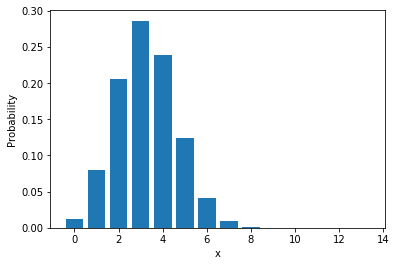

[1.27909480e-02 8.00618599e-02 2.05873354e-01 2.86329607e-01
 2.38608006e-01 1.24691926e-01 4.15639753e-02 8.81660082e-03
 1.16690305e-03 9.26113531e-05 4.11606014e-06 9.10185289e-08
 7.98408148e-10 1.57476952e-12]


In [5]:
Outcomes=np.arange(0,14,1)
Hyp_pmf=(spsp.comb(13,Outcomes)*spsp.comb(39,13-Outcomes))/spsp.comb(52,13)
#print(Hyp_pmf)
print(np.sum(Hyp_pmf))
plt.bar(Outcomes, Hyp_pmf)
plt.xlabel("x")
plt.ylabel("Probability")
plt.show()
print(Hyp_pmf)

##Q2 [8 points]

Visualize the CDF of the distribution from x=-2 to x=18. Do not use built-in functions that directly provides statistics for hypergeometric distribution.

Make sure to give the x_label and y_label.

Text(0,0.5,'Probability')

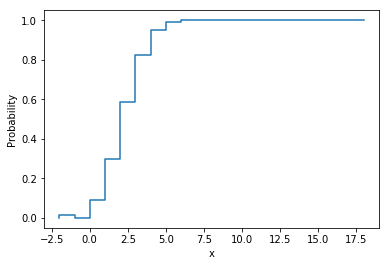

In [6]:
CDF=np.cumsum(Hyp_pmf)
Outcomes=np.arange(-2,19,1)
#print(len(Outcomes))
CDF=np.insert(CDF,[0,1,-1,-2,-3,-4,-5], [0,0,1,1,1,1,1])
#print(len(CDF))
plt.step(Outcomes,CDF)
plt.xlabel("x")
plt.ylabel("Probability")

## Q3 [8 points]
If a person bets 5, compute the **expected value** of his winning amount. Do not use a loop.


In [7]:
x = np.arange(0,14,1)
n = 5
win = np.abs(x - n)*(-1)
print(win)
win[np.where(x == n)] = n*2
exp_win = np.sum(Hyp_pmf*win)

print('The expected value of winning amount is : ', exp_win)

[-5 -4 -3 -2 -1  0 -1 -2 -3 -4 -5 -6 -7 -8]
The expected value of winning amount is :  -0.6292596686466094


## Q4 [8 points]

Construct an array to store the **expected values** of the winnings corresponding to each betting value from 0 to 13. Loop is allowed.

Based on Boolean mask, find out which bettings have a positive expected return and which betting is the most worthwile (highest expected winnings).

In [8]:
exp_win = np.zeros(x.size)
n = 13
for i in range(n+1):
    win = -1*np.abs(x - i)
    win[np.where(x == i)] = 2*i
    exp_win[i] = np.sum(Hyp_pmf*win)
    
print('The array of expected winnings for different bets is : ', exp_win)
print('The bets with positive expected values are : ', x[exp_win > 0])
print('The most worthwhile bet is : ', x[np.argmax(exp_win)])
print("The respective highest expected winning is : ", exp_win[x[np.argmax(exp_win)]])

The array of expected winnings for different bets is :  [-3.25       -2.11545818 -0.6377941   0.65923781  0.68001267 -0.62925967
 -2.27412263 -3.62929727 -4.73153179 -5.7483416  -6.74991786 -7.749998
 -8.74999998 -9.75      ]
The bets with positive expected values are :  [3 4]
The most worthwhile bet is :  4
The respective highest expected winning is :  0.6800126743939218


##Exercise 3 [Total: 8 Points]


Columbia University is thinking about adopting some new lightbulbs. Assume that the lifespan of a new lightbulb (measured by years) follows a Weibull distribution. A Weibull distribution has the PDF

$$f(x) = \frac{k}{\lambda}\left(\frac{x}{\lambda}\right)^{k-1}e^{-(x/\lambda)^k},$$ for $x \geq 0$. 


Let's assume $$k = 0.8, \lambda = 5$$

Visualize the pdf of the lifespan from x=0.001 to x=2, 
Label the x axis and y axis.



Text(0,0.5,'Probability')

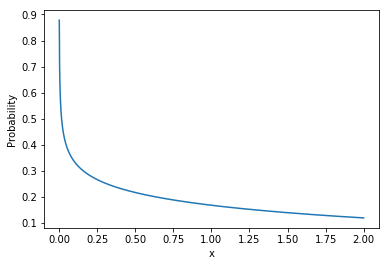

In [9]:
k=0.8
l=5
x_array=np.linspace(0.001,2,1000)
pdf_weibull=(k/l)*((x_array/l)**(k-1))*np.exp(-1*(x_array/l)**k)
plt.plot(x_array,pdf_weibull)
plt.xlabel("x")
plt.ylabel("Probability")